# Practical 7 - Pandas and statistics 

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this notebook we are going to use Pandas to load a spreadsheet of time series data and perform some statistical analysis on it. The data for this exercise has been taken from the following repository:

 - The Harvard Dataverse: https://dataverse.harvard.edu
 - Wang, Hongwei, 2019, "Air pollution and meteorological data in Beijing 2017-2018", https://doi.org/10.7910/DVN/USXCAK, Harvard Dataverse, V1
 - URL: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/USXCAK

We are going to load two datasets: One with meterorological data, and the other with air quality data. It is important to understand the concentrations and variability of key pollutants as a function of time and meteorological conditions. We will do this through the following activities:
    
 - 1) [Using Pandas to createg a dataframe](#Part1)
      * [Exercise 1: Count how many meteorological stations there are in Beijing](#Exercise1)
      * [Exercise 2: Plot a histogram of temperature at the Shunyi meteorological station](#Exercise2)
 - 2) [Merging two dataframes: Using a common time index](#Part2)
      * [Exercise 3: Plot diurnal profile of PM2.5 for different months](#Exercise3)
      * [Exercise 4: Create a new dataframe for the air quality station 'pingchang'](#Exercise4)
 - 3) [Statistical analysis on dataframes¶](#Part3)
      * [Exercise 5: Create a heatmap of correlation coefficients for the air quality station 'pingchang'](#Exercise5)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

### Using Pandas to open a CSV file and understanding a dataframe <a name="Part1"></a>

First let us load our dataset into a Pandas dataframe. If you remember from our last practical, we can use the internal Pandas function

```python
pd.read_csv(name of CSV file)
```

and then preview our dataframe using the 

```python
<<name of dataframe>>.head()
```
function. We do this below by loading in a CSV file that gives us a range of meteorological variables from stations across Beijing over the years 2017 to 2018. Im giving my dataframe a name that at least reminds us it includes meteorological data. Thus Im using <code> data_meteo </code>.

In [1]:
import pandas as pd

# Read data from file 'beijing_17_18_meo.csv' 
# (in the same directory that your python process is based) You can control delimiters, rows, column names with read_csv (see later) 

if 'google.colab' in str(get_ipython()):
    data_meteo = pd.read_csv('https://raw.githubusercontent.com/loftytopping/DEES_programming_course/master/data/beijing_17_18_meo.csv')
    data_meteo.head()
else:
    data_meteo = pd.read_csv("data/beijing_17_18_meo.csv") 
    data_meteo.head()

# Preview the first 5 lines of the loaded data 
data_meteo.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,30/01/2017 16:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,30/01/2017 17:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,30/01/2017 18:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,30/01/2017 19:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,30/01/2017 20:00,-4.1,1026.7,26,17.0,1.1,Haze


I can also check the data type of each column by using the 

```python
<<name of dataframe>>.dtypes
```
function. This is useful for a number of reasons that might include whether we need to convert between, for example, <code> string </code> to <code> float </code> to perform some numerical analysis. As we will see shortly, we can also check whether we are using a format called <code> datetime </code>. As the name suggests, this format allows us to perform some really neat data manipulation on time series data.  In the code box below, I check the data types of columns stored in our meteorology dataframe using the <code> .dtypes </code> property of our dataframe.

In [2]:
data_meteo.dtypes

station_id         object
longitude         float64
latitude          float64
utc_time           object
temperature       float64
pressure          float64
humidity            int64
wind_direction    float64
wind_speed        float64
weather            object
dtype: object

As per the last practical, let's see how many rows we have. This isnt always the best way to calculate the number of unique entries as duplicate datapoints can be common, but now that we have created a dataframe we can see how many entries it has. We can do this via the following properties of our frame: 

```python
data.size
data.shape
data.ndim
```

In [3]:
# Lets also check the data frame size
size = data_meteo.size 
print("Size of dataframe =", size)
  
# dataframe.shape - gives the seperated number of rows, columns, etc
shape = data_meteo.shape 
print("Shape of dataframe =", shape)
  
# dataframe.ndim  - Number of dimensions. Do we have a 2D array, 3D array?? etc
ndim = data_meteo.ndim 
print("Number of dimensions =", ndim)

Size of dataframe = 1580470
Shape of dataframe = (158047, 10)
Number of dimensions = 2


That is quite a large number of observations! Let's see how many unique stations there are in our first exercise. For this you might want to go back to Practical 6 and copy-and-paste code over, before changing portions of text for use here. 

<div class="alert alert-block alert-success">
<b> Exercise 1: Count how many meteorological stations there are in Beijing. <a name="Exercise1"></a>  </b> 
    
If you recall, in Practical 6, we were able to count how many unique values we had from a particular column in our data frame. In this case, you should find there are 18 different stations. 

</div>

In [4]:
#------'INSERT CODE HERE'------
data_meteo['station_id'].value_counts().size
#------------------------------

18

<div class="alert alert-block alert-success">
<b> Exercise 2: Plot a histogram of temperature at Shunyi <a name="Exercise2"></a>  </b> 
    
As a quick follow-on exercise, plot a histogram of temperature from the station with the ID <code> shunyi_meo </code>. If you recall, in Practical 6 we were able to generate a histogram from a particular column in our data frame. Your result should look like the following figure:
    
![](images/Practical7_example1.png ) 

</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E77CAD6C8>]],
      dtype=object)

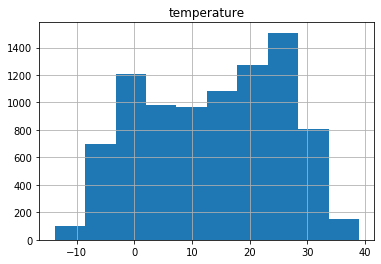

In [5]:
# Plot the histogram with one line
#------'INSERT CODE HERE'------
data_meteo[data_meteo['station_id'] == 'shunyi_meo'].hist(column='temperature')
#------------------------------

### Merging two dataframes: Using a common time index <a name="Part2"></a>

Quite often, we do not have all the data we need in one place. You can spend a long time trying to merge datasets and then perform analysis on it. In the following we are going to load two files into two seperate dataframes before merging into one. Once we have the data in one frame, we can perform some correlation analysis on it. 

Let us recap what happens when we load a file into a dataframe. 

When we load our data into a frame, Pandas indexes each row...so we can access the data from it. You can see this index given on the left hand side in a preview of the frame via <code> .head() </code>. The problem we have is that, for correlation analysis, we want to make sure all of our data points are on a common index. In this case, we want to make sure we have our measurements on a common time base. As always, there is a Python function for that.  If you notice, our previously loaded dataframe has a column with a date/time stamp labelled as <code> utc_time </code>. This means 'Coordinated Universal Time (UTC)'. If we make that column our dataframe index, and then merge two dataframes onto this common index, we are in business. 

We have already loaded the meteorological data, but let us now load in the air quality data. Again, once we load this in we will preview our dataframe using the <code> .head() </code> function.

In [7]:
# Lets load the second spreadsheet
# Read data from file 'beijing_17_18_aq.csv' 
# (in the same directory that your python process is based) You can control delimiters, rows, column names with read_csv (see later) 
if 'google.colab' in str(get_ipython()):
    data_aq = pd.read_csv('https://raw.githubusercontent.com/loftytopping/DEES_programming_course/master/data/beijing_17_18_aq.csv')
    data_aq.head()
else:
    data_aq = pd.read_csv("data/beijing_17_18_aq.csv") 
    data_aq.head()
# Preview the first 5 lines of the loaded data 
data_aq.head()# Read data from file 'beijing_17_18_meo.csv' 

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,aotizhongxin_aq,01/01/2017 14:00,453.0,467.0,156.0,7.2,3.0,9.0
1,aotizhongxin_aq,01/01/2017 15:00,417.0,443.0,143.0,6.8,2.0,8.0
2,aotizhongxin_aq,01/01/2017 16:00,395.0,467.0,141.0,6.9,3.0,8.0
3,aotizhongxin_aq,01/01/2017 17:00,420.0,484.0,139.0,7.4,3.0,9.0
4,aotizhongxin_aq,01/01/2017 18:00,453.0,520.0,157.0,7.6,4.0,9.0


## Implementing the datetime format

As already noted, we have a column that has information on the time each observation was made. When we interrogate the original data type we are told the <code> utc_time </code> column has the type <code> object </code>. The details are not important here but essentially this is telling us that we have variable string lengths in an array here. We know however this provides us with date and time.

The provenance and details of the datetime format are [long and convoluted](https://docs.python.org/3/library/datetime.html), but the important thing to note here is that once we convert strings to the datetime format, we can ask Pandas to extract powerful information like hourly averages or diurnal profiles without having to get our hands dirty with Numpy or similar.

First we need to convert the current data type. We can use the internal Pandas function:

```python
pandas.to_datetime()
```
In the following two code boxes we convert the <code> utc_time </code> column in both dataframes to datetime and then print the new list of data types. You may find this takes a few seconds.


In [8]:
data_aq['utc_time']=pd.to_datetime(data_aq['utc_time'])
data_aq.dtypes

stationId            object
utc_time     datetime64[ns]
PM2.5               float64
PM10                float64
NO2                 float64
CO                  float64
O3                  float64
SO2                 float64
dtype: object

In [9]:
data_meteo['utc_time']=pd.to_datetime(data_meteo['utc_time'])
data_meteo.dtypes

station_id                object
longitude                float64
latitude                 float64
utc_time          datetime64[ns]
temperature              float64
pressure                 float64
humidity                   int64
wind_direction           float64
wind_speed               float64
weather                   object
dtype: object

Can you see the <code> datetime64[ns] </code> result? Now let us move on with merging dataframes. We will come back to this new format shortly.

In the data preview you can see we have a column with an identification of station name. The meteorological file includes the extension _meo whereas the air quality dataset includes the extension _aq. 

Before we merge dataframes into one, let us focus on one station for now: The Shunyi station. 

We have already been practicing extracting data from a specific column. If we want to extract data from a specific site, thus row, we can also ask Pandas to extract only rows that match this criteria in our data frame. In doing so we can create two new dataframes:

 - One that includes meteorology data
 - One that includes air quality data
 
Check out the code below. As in the previous practical, Im using a conditional statement within square brackets:

```python
new_dataframe = old_dataframe[old_dataframe[column] == some value]
```

Just to re-iterate an important point on use of the equals sign. When we are checking a value is true, we use two equal signs <code> == </code> rather than one <code> = </code> when assigning a value to a variable. In the code box below, we now create two seperate dataframes for the Shunyi met and air quality stations.

In [10]:
# Lets create a seperate Meteorology based data frame
Shunyi_met_df = data_meteo[data_meteo["station_id"] == "shunyi_meo"]
# And now lets create a seperate Air Quality based data frame
Shunyi_aq_df = data_aq[data_aq["stationId"] == "shunyi_aq"]


#Lets just check we have the right data by printing the head information:
# Preview the first 5 lines of the loaded data 
Shunyi_met_df.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [11]:
#Same for the air quality data
Shunyi_aq_df.head()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
195492,shunyi_aq,2017-01-01 14:00:00,386.0,477.0,116.0,6.3,4.0,8.0
195493,shunyi_aq,2017-01-01 15:00:00,410.0,476.0,121.0,6.3,4.0,10.0
195494,shunyi_aq,2017-01-01 16:00:00,418.0,493.0,118.0,6.8,4.0,10.0
195495,shunyi_aq,2017-01-01 17:00:00,474.0,532.0,133.0,7.9,5.0,11.0
195496,shunyi_aq,2017-01-01 18:00:00,449.0,456.0,137.0,7.3,4.0,11.0


So, we now have two seperate dataframes.

We want to merge both and make sure data on have data at the same point in time. Can you see an issue we have with both of our dataframes? The time stamp does not start at the same point. Fortunately, there is another Pandas function that can do this for us. The function is 

```python
.merge
```
We [.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) two dataframes using a common index. In this case we want to merge values based on the column 'utc_time'. We are going to create a new dataframe by merging both Shunyi_aq_df and Shunyi_met_df according the the index given in column 'utc_time'. 

But, can you see something that might be a problem? Each data frame uses the row number as index so we also need to change this to 'utc_time'. Thus we have two operations to perform:

1. Set the **index** of both dataframes to be the same
2. Merge both dataframes into one using this new index.

For the first point, we can do that for each dataframe by using the command 

```python
.set_index('utc_time')
```

So, for example, when we run the following command do you see the index has changed?:

In [12]:
# Set the index of the meteorological dataframe to be UTC time
Shunyi_met_df.set_index('utc_time')
# What do you see below?

,station_id,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed,weather
utc_time,,,,,,,,,
2017-01-30 16:00:00,shunyi_meo,116.615278,40.126667,-1.7,1028.7,15,215.0,1.6,Sunny/clear
2017-01-30 17:00:00,shunyi_meo,116.615278,40.126667,-3.5,1028.4,24,16.0,1.0,Haze
2017-01-30 18:00:00,shunyi_meo,116.615278,40.126667,-3.7,1028.1,27,32.0,1.1,Haze
2017-01-30 19:00:00,shunyi_meo,116.615278,40.126667,-3.9,1027.6,27,21.0,0.9,Haze
2017-01-30 20:00:00,shunyi_meo,116.615278,40.126667,-4.1,1026.7,26,17.0,1.1,Haze
...,...,...,...,...,...,...,...,...,...
2018-01-31 11:00:00,shunyi_meo,116.615278,40.126667,-0.1,1023.9,19,266.0,1.7,Sunny/clear
2018-01-31 12:00:00,shunyi_meo,116.615278,40.126667,-3.1,1024.1,30,276.0,1.1,Sunny/clear
2018-01-31 13:00:00,shunyi_meo,116.615278,40.126667,-4.5,1024.4,39,999017.0,0.2,Sunny/clear


Likewise, what happens when we set the air quality data frame index to 'utc_time'? 

In [13]:
# Now do the same for the other dataframe
Shunyi_aq_df.set_index('utc_time')

,stationId,PM2.5,PM10,NO2,CO,O3,SO2
utc_time,,,,,,,
2017-01-01 14:00:00,shunyi_aq,386.0,477.0,116.0,6.3,4.0,8.0
2017-01-01 15:00:00,shunyi_aq,410.0,476.0,121.0,6.3,4.0,10.0
2017-01-01 16:00:00,shunyi_aq,418.0,493.0,118.0,6.8,4.0,10.0
2017-01-01 17:00:00,shunyi_aq,474.0,532.0,133.0,7.9,5.0,11.0
2017-01-01 18:00:00,shunyi_aq,449.0,456.0,137.0,7.3,4.0,11.0
...,...,...,...,...,...,...,...
2018-01-31 11:00:00,shunyi_aq,30.0,88.0,45.0,0.8,37.0,13.0
2018-01-31 12:00:00,shunyi_aq,31.0,88.0,71.0,0.9,13.0,16.0
2018-01-31 13:00:00,shunyi_aq,36.0,92.0,79.0,1.0,6.0,19.0


So each dataframe now uses the same index. We can now combine them into a new dataframe using the following function:
    
```python
pd.merge(dataframe1,dataframe2)
```
    
Please check the code snippet below. When this prints to the screen, you can see that our data now starts on the 30/1/2017, even though we had meteorological data before that date. 

In [14]:
# Now we can combine these into a new dataframe

combined_df=pd.merge(Shunyi_met_df,Shunyi_aq_df) #, how='inner',left_index=True, right_index=True)
combined_df.head()
combined_df=combined_df.set_index('utc_time')
combined_df.index

DatetimeIndex(['2017-01-30 16:00:00', '2017-01-30 17:00:00',
               '2017-01-30 18:00:00', '2017-01-30 19:00:00',
               '2017-01-30 20:00:00', '2017-01-30 21:00:00',
               '2017-01-30 22:00:00', '2017-01-30 23:00:00',
               '2017-01-31 00:00:00', '2017-01-31 01:00:00',
               ...
               '2018-01-31 06:00:00', '2018-01-31 07:00:00',
               '2018-01-31 08:00:00', '2018-01-31 09:00:00',
               '2018-01-31 10:00:00', '2018-01-31 11:00:00',
               '2018-01-31 12:00:00', '2018-01-31 13:00:00',
               '2018-01-31 14:00:00', '2018-01-31 15:00:00'],
              dtype='datetime64[ns]', name='utc_time', length=8220, freq=None)

In [15]:
# Let's preview the new dataframe. Have the two previous frames merged? What difference can you notice,
# baring in mind that our start times were different? Pandas has sorted this out for us.
combined_df.head()

,station_id,longitude,latitude,temperature,pressure,humidity,wind_direction,wind_speed,weather,stationId,PM2.5,PM10,NO2,CO,O3,SO2
utc_time,,,,,,,,,,,,,,,,
2017-01-30 16:00:00,shunyi_meo,116.615278,40.126667,-1.7,1028.7,15,215.0,1.6,Sunny/clear,shunyi_aq,94.0,104.0,42.0,0.2,44.0,27.0
2017-01-30 17:00:00,shunyi_meo,116.615278,40.126667,-3.5,1028.4,24,16.0,1.0,Haze,shunyi_aq,136.0,NaN,52.0,3.1,28.0,37.0
2017-01-30 18:00:00,shunyi_meo,116.615278,40.126667,-3.7,1028.1,27,32.0,1.1,Haze,shunyi_aq,112.0,NaN,43.0,2.5,31.0,26.0
2017-01-30 19:00:00,shunyi_meo,116.615278,40.126667,-3.9,1027.6,27,21.0,0.9,Haze,shunyi_aq,110.0,NaN,42.0,2.7,26.0,26.0
2017-01-30 20:00:00,shunyi_meo,116.615278,40.126667,-4.1,1026.7,26,17.0,1.1,Haze,shunyi_aq,112.0,NaN,43.0,2.9,NaN,27.0


<div class="alert alert-block alert-success">
<b> Exercise 3: Plot diurnal profile of PM2.5 for different months <a name="Exercise3"></a>  </b> 
    
Now that you have a new dataframe with a datetime index, we can plot diurnal profiles of entire columns with only one line of code! Specifically, we are going to use another plotting module called Seaborn to produce box-plots of, initially, PM2.5. In the code box below we provide you with a ready-made solution that looks at all of our data. The boxplot function of Seaborn requires that we specific the data we want to work with along with both the <code> x </code> and <code> y </code> variables as columns in that data. We have already defined a new data frame we want to work with, but how do we specific hours of day for our <code> x </code> variables? Take a look at the following code:
    
```python
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8,8))
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['PM2.5'], ax=axes)
```
Remember that we can access properties of our dataframe using the <code> . </code> operator? Now that we have specified the index to be in the datetime format, we can access the <code> .index </code> of our dataframe and then the <code> .hour </code> of that index. Behind the scenes, Pandas can pass the data for our <code> y </code> variable of interest, <code> combined_df['PM2.5'] </code>, to the Seaborn box-plotting function. 
    
Your challenge is to populate the right-hand plot, which is currently empty, with data on PM2.5 for August. Do you recall how we select data from our dataframe using conditional statements? As a clue, if I wanted to specify the month of March in a conditional statement I would write:
    
```python
combined_df.index.month == 3    
```
  
</div>
    
</div>

Text(0.5, 1.0, 'August')

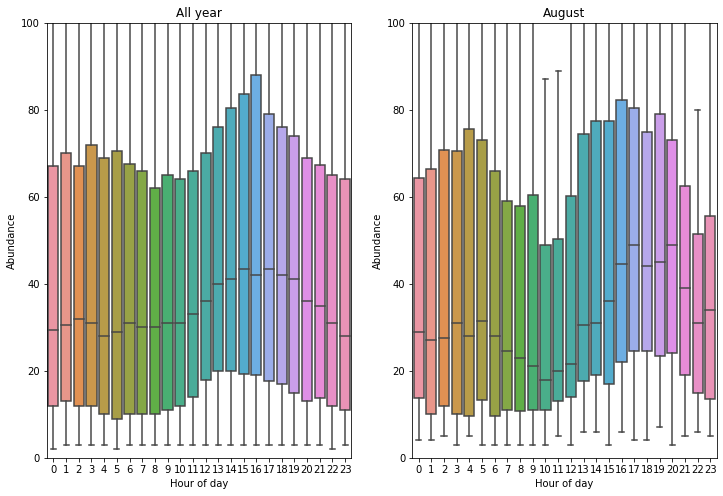

In [16]:
# Let's preview the new dataframe. Have the two previous frames merged? What difference can you notice,
# baring in mind that our start times were different? Pandas has sorted this out for us.
#combined_df.head()
import seaborn as sns
import matplotlib.pyplot as plt

#------'INSERT CODE HERE'------
fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data=combined_df,x=combined_df.index.hour, y=combined_df['PM2.5'], ax=axes[0]).set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df[combined_df.index.month == 8],x=combined_df[combined_df.index.month == 8].index.hour, y=combined_df[combined_df.index.month == 8]['PM2.5'], ax=axes[1]).set(xlabel='Hour of day',ylabel='Abundance')
axes[0].set_ylim([0,100])
axes[1].set_ylim([0,100])
axes[0].set_title('All year')
axes[1].set_title('August')
#------------------------------


<div class="alert alert-block alert-success">
<b> Exercise 4: Create a new dataframe for the air quality station 'pingchang' <a name="Exercise4"></a>  </b> 
    
In this exercise you will need to combine the operations above and merge the meteorology and air quality existing datasets into a new one for the station Pingchang. Once you have done that, access a preview:

![](images/Practical7_preview_output.png ) 

and also calculate the maximum and minimum of each air quality variable using the relevant Numpy functions. Your results should confirm:

 - PM2.5 = 522.0
 - PM10 = 1010.0
 - NO2 = 154.0
 - CO = 6.4
 - O3 = 378.0
 - SO2 = 300.0
    
Following this, produce a diurnal plot for PM2.5 and PM10 side-by-side. You may find you need to change the scales of each graph to make for easier comparison. 

<div class="alert alert-block alert-warning">
<b>Please note:</b> If the results from your maximum calculation all produce a 'Nan' (Not-a-number), this means your columns have NaN values. In this case, let us assume you do not want to investigate those but simply ignore them. In this case you can use

```python
numpy.nanmax
```
  
</div>
    
</div>

Max value for PM2.5 =  522.0
Max value for PM10 =  1010.0
Max value for NO2 =  154.0
Max value for CO =  6.4
Max value for O3 =  378.0
Max value for SO2 =  300.0


Text(0.5, 1.0, 'PM10')

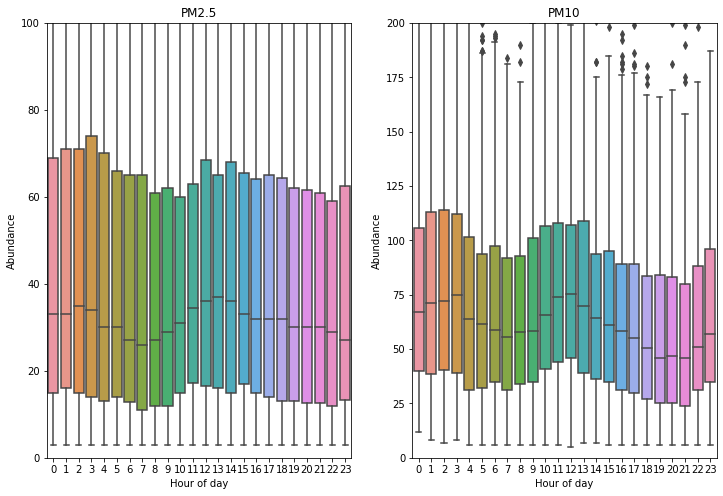

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#------'INSERT CODE HERE'------
# Lets create a seperate Meteorology based data frame
pingchang_met_df = data_meteo[data_meteo["station_id"] == "pingchang_meo"]
# And now lets create a seperate Air Quality based data frame
pingchang_aq_df = data_aq[data_aq["stationId"] == "pingchang_aq"]

# Set the index of the meteorological dataframe to be UTC time
pingchang_met_df.set_index('utc_time')
# Now do the same for the other dataframe
pingchang_aq_df.set_index('utc_time')

#combined_df_new=pd.merge(pingchang_met_df,pingchang_aq_df,on='utc_time')
combined_df_new=pd.merge(pingchang_met_df,pingchang_aq_df) #, how='inner',left_index=True, right_index=True)
combined_df_new.head()
combined_df_new=combined_df_new.set_index('utc_time')

combined_df_new.head()

PM25 = np.nanmax(combined_df_new["PM2.5"].values)
PM10 = np.nanmax(combined_df_new["PM10"].values)
NO2 = np.nanmax(combined_df_new["NO2"].values)
CO = np.nanmax(combined_df_new["CO"].values)
O3 = np.nanmax(combined_df_new["O3"].values)
SO2 = np.nanmax(combined_df_new["SO2"].values)

print("Max value for PM2.5 = ",PM25) 
print("Max value for PM10 = ",PM10) 
print("Max value for NO2 = ",NO2)
print("Max value for CO = ",CO)
print("Max value for O3 = ",O3) 
print("Max value for SO2 = ",SO2) 

fig, axes = plt.subplots(1,2,figsize=(12,8))
sns.boxplot(data=combined_df,x=combined_df_new.index.hour, y=combined_df_new['PM2.5'], ax=axes[0]).set(xlabel='Hour of day',ylabel='Abundance')
sns.boxplot(data=combined_df,x=combined_df_new.index.hour, y=combined_df_new['PM10'], ax=axes[1]).set(xlabel='Hour of day',ylabel='Abundance')
axes[0].set_ylim([0,100])
axes[1].set_ylim([0,200])
axes[0].set_title('PM2.5')
axes[1].set_title('PM10')
#------------------------------


### Statistical analysis on dataframes <a name="Part3"></a>

We have gone to all this trouble to build dataframes. We have practiced selecting a subset and also merging to create a new frame. We can also now perform common statistical operations on our data to try and understand any interesting relationships across multiple variables. 

### Correlation coefficients

Pandas has a variety of functions for generating stats from our data. In the following code I demonstrate how we can select a subset of our columns and look at the correlation coefficient between each variable. Let us work with our new combined dataframe 'combined_df'.

The first step is to create a correlation coefficient matrix. We can do that by telling Pandas which columns we are interested in:

```python
dataframe[['column 1','column 2','column 3'...etc]]
```

and then using the 

```python
.corr()
```

to this subset:

In [18]:
corr = combined_df[['temperature','pressure','humidity','PM2.5','PM10','NO2','CO','O3','SO2']].corr()
print("Correlation coefficient matrix = ", corr)

Correlation coefficient matrix =               temperature  pressure  humidity     PM2.5      PM10       NO2  \
temperature     1.000000 -0.862873  0.213701  0.041147  0.184763 -0.182444   
pressure       -0.862873  1.000000 -0.276145 -0.086732 -0.235992  0.039646   
humidity        0.213701 -0.276145  1.000000  0.293561  0.093653  0.251402   
PM2.5           0.041147 -0.086732  0.293561  1.000000  0.844545  0.513936   
PM10            0.184763 -0.235992  0.093653  0.844545  1.000000  0.359391   
NO2            -0.182444  0.039646  0.251402  0.513936  0.359391  1.000000   
CO             -0.201598  0.083819  0.264412  0.761744  0.557353  0.593860   
O3              0.578449 -0.459206 -0.266630 -0.066553  0.026601 -0.521188   
SO2            -0.254369  0.189250 -0.144239  0.490951  0.249974  0.443254   

                   CO        O3       SO2  
temperature -0.201598  0.578449 -0.254369  
pressure     0.083819 -0.459206  0.189250  
humidity     0.264412 -0.266630 -0.144239  
PM2.5    

So here we have our correlation coefficients! It would be much easier to visualise this somehow. A popular plotting module used with Pandas is [Seaborn](https://seaborn.pydata.org):

>>> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Check out the code snippet below:

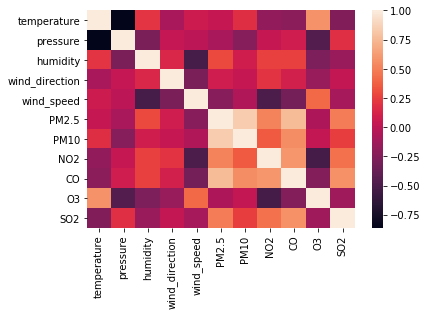

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# calculate the correlation matrix
corr = combined_df[['temperature','pressure','humidity','wind_direction','wind_speed','PM2.5','PM10','NO2','CO','O3','SO2']].corr()
# Now use an internal function within Seaborn called '.heatmap'
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# And we now need to show the plot.
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 5: Create a heatmap of correlation coefficients for the air quality station 'pingchang' <a name="Exercise5"></a>  </b> 
    
Replicate the procedures given above for your new merged dataframe created in Exercise 4. Your heatmap should look like the following figure:

![](images/Practical7_heatmap_output.png ) 

</div>

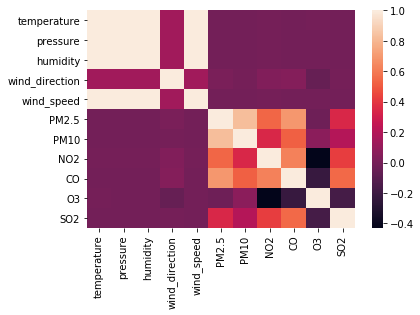

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# calculate the correlation matrix

#------'INSERT CODE HERE'------
corr_new = combined_df_new[['temperature','pressure','humidity','wind_direction','wind_speed','PM2.5','PM10','NO2','CO','O3','SO2']].corr()
# Now use an internal function within Seaborn called '.heatmap'
sns.heatmap(corr_new, xticklabels=corr_new.columns, yticklabels=corr_new.columns)
#------------------------------

# And we now need to show the plot.
plt.show()

We can even try to viualise all of these relationships via a series of scatter plots. To make this easier to visualise let's focus on 9 variables and also apply the <code> .dropna() </code> extension to our dataframe to remove <code> NaN </code> entries. An entry of <code> NaN </code> can often arise through errors in processing and literally means 'Not-a-Number'.

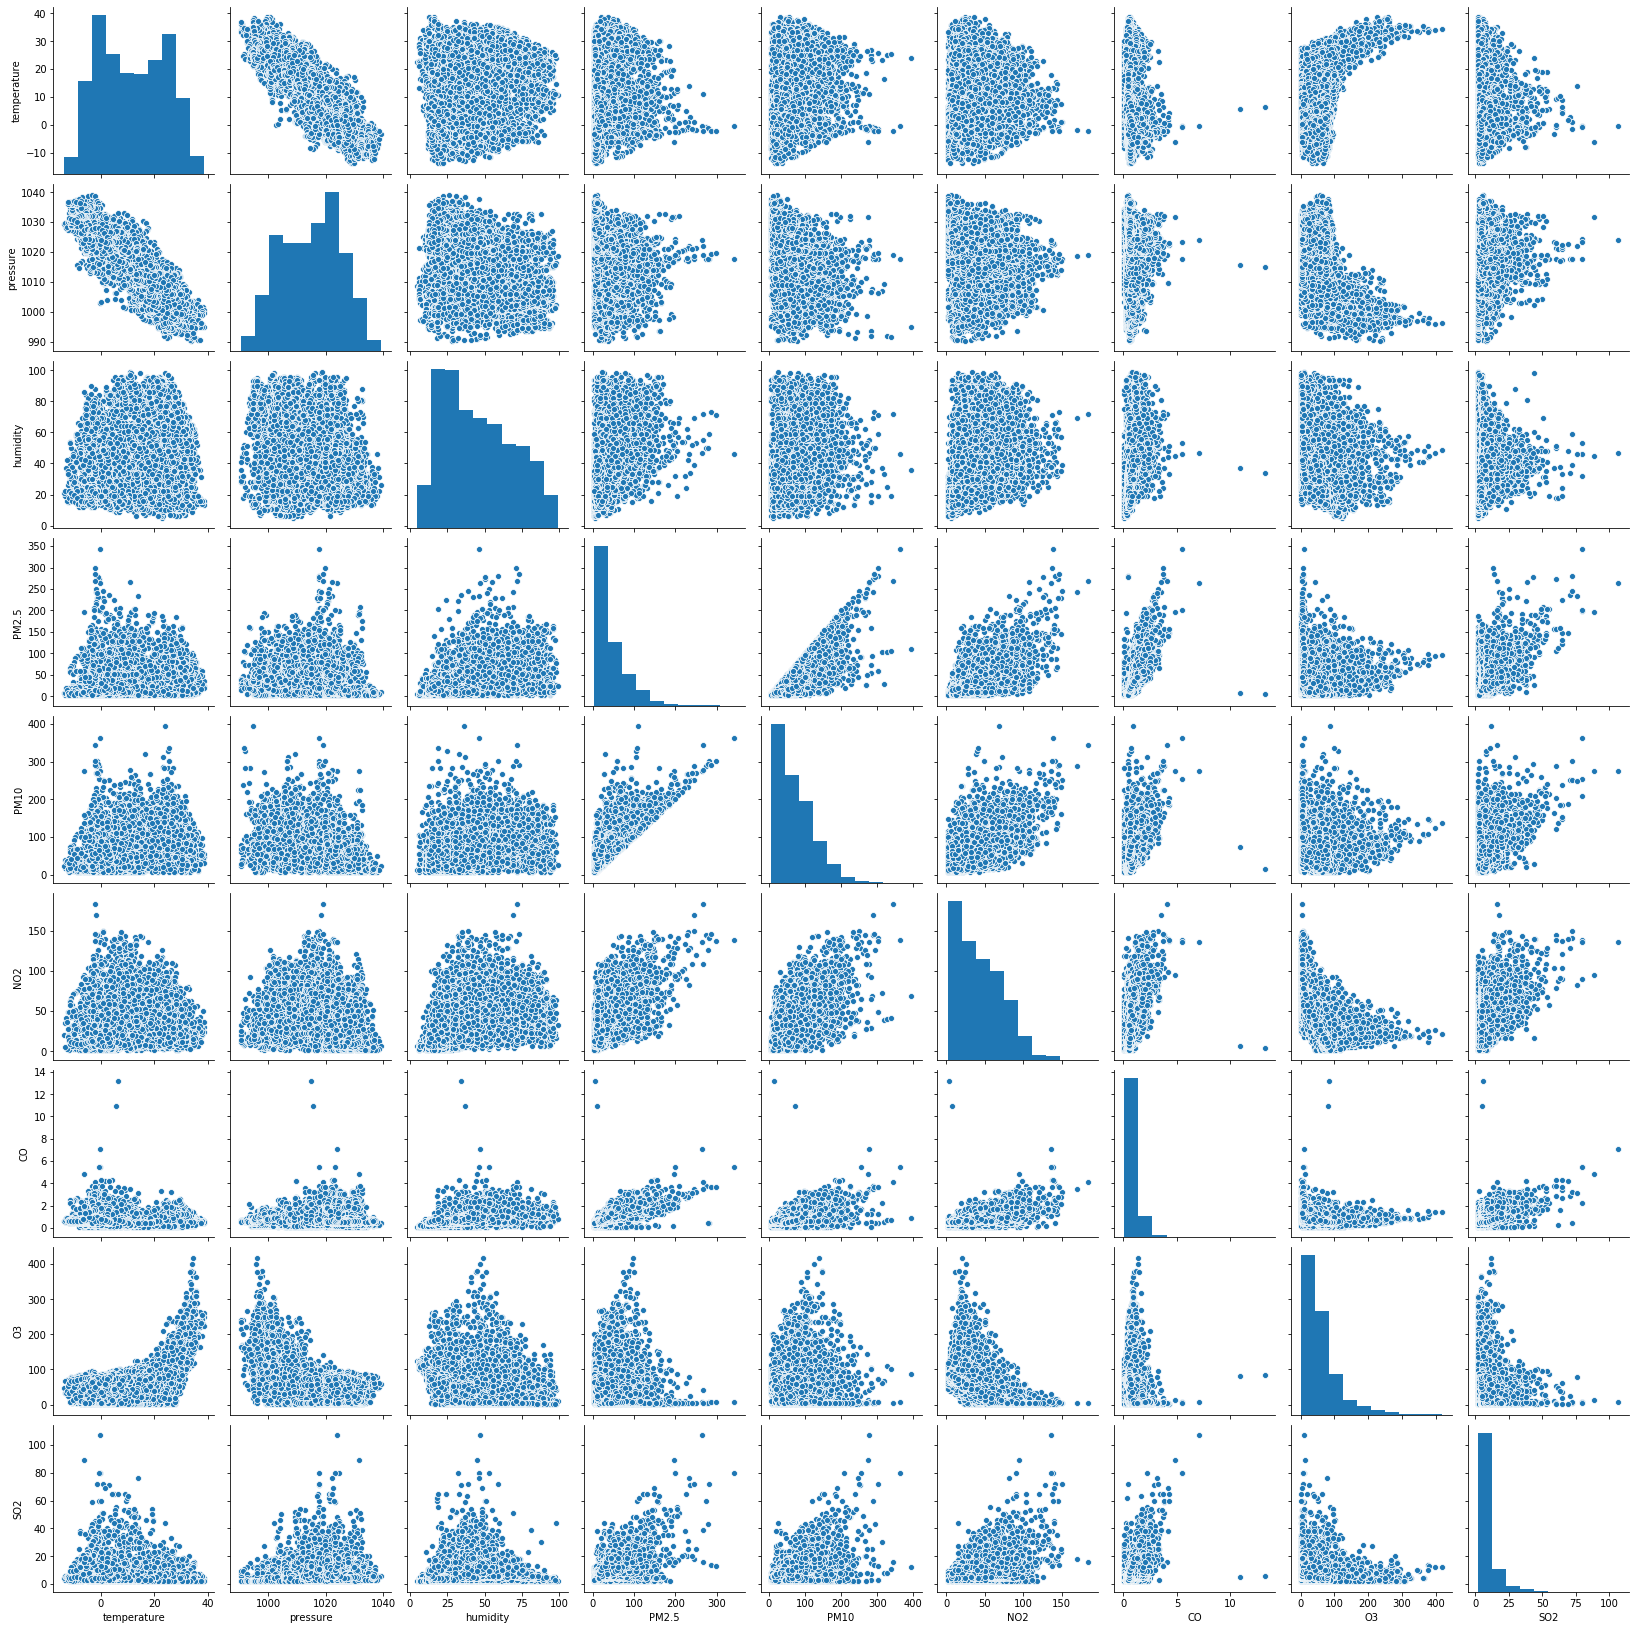

In [21]:
# Create the default pairplot
sns.pairplot(combined_df[['temperature','pressure','humidity','PM2.5','PM10','NO2','CO','O3','SO2']].dropna())

### Additional example: Producing a box-plot of our dataframe

In addition to correlation coefficients, we can get a better understanding of our data through a series of box-plots. A box-plot. A [very nice overview]() is:

> Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

> - median (Q2/50th Percentile): the middle value of the dataset.
> - first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
> - third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
> - interquartile range (IQR): 25th to the 75th percentile.
> - whiskers 
> - outliers 
> - “maximum”: Q3 + 1.5*IQR
> - “minimum”: Q1 -1.5*IQR
 
As an example, lets see how the PM2.5 data varies in our new dataframe as:

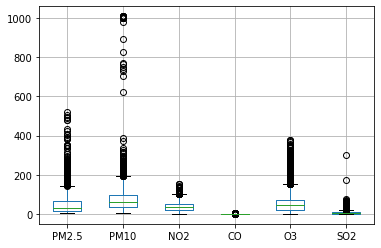

In [114]:
combined_df_new[['PM2.5','PM10','NO2','CO','O3','SO2']].boxplot(column=['PM2.5','PM10','NO2','CO','O3','SO2'])

Let us make the figure bigger and also use a Log scale for the y-axes:

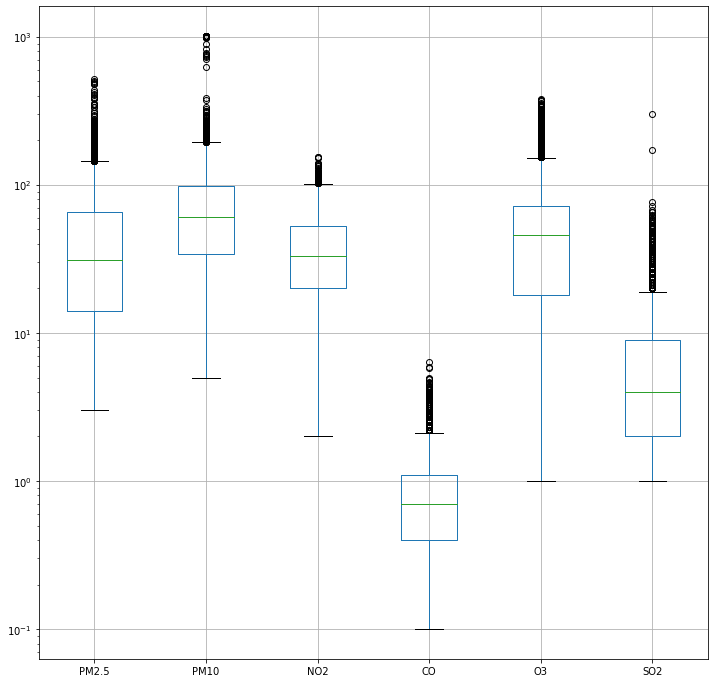

In [27]:
combined_df_new[['PM2.5','PM10','NO2','CO','O3','SO2']].boxplot(
    column=['PM2.5','PM10','NO2','CO','O3','SO2'],figsize=(12,12)).set_yscale('log')
